In [1]:
import numpy as np
import pandas as pd
#import re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_file = "~/Documents/python/project02/amazon_musical_instru_star_rev_only.tsv"
col_list = ["star_rating","review_body"]
#reviews_df = pd.read_csv(data_file, sep="\t", usecols=col_list, low_memory=False)
reviews_df = pd.read_csv(data_file, sep="\t", usecols=col_list, nrows=20000)

In [3]:
reviews_df['star_rating'] = reviews_df['star_rating'].fillna(0)
reviews_df['review_body'] = reviews_df['review_body'].fillna('')

In [ ]:
reviews_df.head(15)

In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   star_rating  20000 non-null  int64 
 1   review_body  20000 non-null  object
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [ ]:
reviews_df.tail(10)

In [5]:
# stats on the star rating for the 20,000 records
print("Min star:", reviews_df['star_rating'].min())
print("Max star:", reviews_df['star_rating'].max())
print("Average star:", reviews_df['star_rating'].mean())
print("Median star:", reviews_df['star_rating'].median())

Min star: 1
Max star: 5
Average star: 4.28765
Median star: 5.0


In [6]:
def count_words(data):
    return len(data.split())

In [7]:
def count_excla(data):
    return data.count("!")

In [8]:
def count_ques(data):
    return data.count("?")

In [9]:
# removes special characters are some "<br />"
def remove_special_chars(data):
    word_list = []
    cleaned_list = []
    alphanum = ""
    data = data.replace("<br />"," ") #replace <br /> text in some reviews with space
    word_list = data.lower().split()
    
    for word in word_list:
        alphanum = [character for character in word if character.isalnum()]
        alphanum = "".join(alphanum)
        cleaned_list.append(alphanum)
        
    cleaned_list = list(filter(None, cleaned_list))
    
    return cleaned_list

In [10]:
# returns a dictionary with the word and number of occurances
def get_uniq_words(data):
    word_counter = {}
    for word in data:
        word_counter[word] = word_counter.get(word, 0) + 1
        
    return(word_counter)

In [11]:
# Count number of words for each review and add a column to the dataframe
word_count = []
excla_count = []
ques_count = []
for index, row in reviews_df.iterrows():
    word_count.append(count_words(reviews_df.iloc[index]['review_body']))
    excla_count.append(count_excla(reviews_df.iloc[index]['review_body']))
    ques_count.append(count_ques(reviews_df.iloc[index]['review_body']))
    
reviews_df["num_of_words"] = word_count
reviews_df["num_exclamations_marks"] = excla_count
reviews_df["num_questions_marks"]= ques_count

In [12]:
# Stats on Word Count for all reviews
print("Stats on word count for all reviews")
print("-----------------------------------")
print("Min number of words:", reviews_df['num_of_words'].min())
print("Max number of words:", reviews_df['num_of_words'].max())
print("Average number of words:", reviews_df['num_of_words'].mean())
print("Median number of words:", reviews_df['num_of_words'].median())

Stats on word count for all reviews
-----------------------------------
Min number of words: 0
Max number of words: 2163
Average number of words: 41.6003
Median number of words: 17.0


In [13]:
# Stats on number of exclamation and question marks for all reviews
print("Stats on exclamation marks for all reviews")
print("-----------------------------------")
print("Min number of exclamation marks:", reviews_df['num_exclamations_marks'].min())
print("Max number of exclamation marks:", reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", reviews_df['num_exclamations_marks'].median())
print('\n')
print("Stats on question marks for all reviews")
print("-----------------------------------")
print("Min number of question marks:", reviews_df['num_questions_marks'].min())
print("Max number of question marks:", reviews_df['num_questions_marks'].max())
print("Average number of question marks:", reviews_df['num_questions_marks'].mean())
print("Median number of question marks:", reviews_df['num_questions_marks'].median())

Stats on exclamation marks for all reviews
-----------------------------------
Min number of exclamation marks: 0
Max number of exclamation marks: 54
Average number of exclamation marks: 0.4231
Median number of exclamation marks: 0.0


Stats on question marks for all reviews
-----------------------------------
Min number of question marks: 0
Max number of question marks: 13
Average number of question marks: 0.0337
Median number of question marks: 0.0


In [14]:
# number of reviews for each star rating
reviews_df.groupby(['star_rating']).count()

,review_body,num_of_words,num_exclamations_marks,num_questions_marks
star_rating,,,,
1,1482,1482,1482,1482
2,817,817,817,817
3,1402,1402,1402,1402
4,3064,3064,3064,3064
5,13235,13235,13235,13235


In [15]:
# analyzing One Star reviews
onestar_reviews_df = reviews_df[reviews_df['star_rating'] == 1]
onestar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 17 to 19962
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             1482 non-null   int64 
 1   review_body             1482 non-null   object
 2   num_of_words            1482 non-null   int64 
 3   num_exclamations_marks  1482 non-null   int64 
 4   num_questions_marks     1482 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 69.5+ KB


In [16]:
# Stats on Word, Exclamation & question mark Count for one star reviews
print("Stats on word, Exclamation & question mark count for 1 Star Reviews")
print("----------------------------------------")
print("Min number of words:", onestar_reviews_df['num_of_words'].min())
print("Max number of words:", onestar_reviews_df['num_of_words'].max())
print("Average number of words:", onestar_reviews_df['num_of_words'].mean())
print("Median number of words:", onestar_reviews_df['num_of_words'].median())
print("Max number of Exclamation Marks:", onestar_reviews_df['num_exclamations_marks'].max())
print("Average number of Exclamation Marks:", onestar_reviews_df['num_exclamations_marks'].mean())
print("Median number of Exclamation Marks:", onestar_reviews_df['num_exclamations_marks'].median())
print("Max number of Question Marks:", onestar_reviews_df['num_questions_marks'].max())
print("Average number of Question Marks:", onestar_reviews_df['num_questions_marks'].mean())
print("Median number of Question Marks:", onestar_reviews_df['num_questions_marks'].median())

Stats on word, Exclamation & question mark count for 1 Star Reviews
----------------------------------------
Min number of words: 0
Max number of words: 1477
Average number of words: 44.152496626180834
Median number of words: 25.0
Max number of Exclamation Marks: 14
Average number of Exclamation Marks: 0.4149797570850202
Median number of Exclamation Marks: 0.0
Max number of Question Marks: 5
Average number of Question Marks: 0.0620782726045884
Median number of Question Marks: 0.0


In [17]:
# analyzing Two Star reviews
twostar_reviews_df = reviews_df[reviews_df['star_rating'] == 2]
twostar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 6 to 19993
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             817 non-null    int64 
 1   review_body             817 non-null    object
 2   num_of_words            817 non-null    int64 
 3   num_exclamations_marks  817 non-null    int64 
 4   num_questions_marks     817 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 38.3+ KB


In [18]:
# Stats on Word Count for two star reviews
print("Stats on word, exclamation & question mark count for 2 Star Reviews")
print("---------------------------------------")
print("Min number of words:", twostar_reviews_df['num_of_words'].min())
print("Max number of words:", twostar_reviews_df['num_of_words'].max())
print("Average number of words:", twostar_reviews_df['num_of_words'].mean())
print("Median number of words:", twostar_reviews_df['num_of_words'].median())
print("Max number of exclamation marks:", twostar_reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", twostar_reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", twostar_reviews_df['num_exclamations_marks'].median())
print("Max number of question marks:", twostar_reviews_df['num_questions_marks'].max())
print("Average number of question marks:", twostar_reviews_df['num_questions_marks'].mean())
print("Median number of question marks:", twostar_reviews_df['num_questions_marks'].median())

Stats on word, exclamation & question mark count for 2 Star Reviews
---------------------------------------
Min number of words: 1
Max number of words: 506
Average number of words: 53.840881272949815
Median number of words: 31.0
Max number of exclamation marks: 10
Average number of exclamation marks: 0.189718482252142
Median number of exclamation marks: 0.0
Max number of question marks: 6
Average number of question marks: 0.04895960832313342
Median number of question marks: 0.0


In [19]:
# analyzing Three Star reviews
threestar_reviews_df = reviews_df[reviews_df['star_rating'] == 3]
threestar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 0 to 19959
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             1402 non-null   int64 
 1   review_body             1402 non-null   object
 2   num_of_words            1402 non-null   int64 
 3   num_exclamations_marks  1402 non-null   int64 
 4   num_questions_marks     1402 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 65.7+ KB


In [20]:
# Stats on Word, exclamation & question mark Count for three star reviews
print("Stats on word, exclamation & question mark count for 3 Star Reviews")
print("------------------------------------------")
print("Min number of words:", threestar_reviews_df['num_of_words'].min())
print("Max number of words:", threestar_reviews_df['num_of_words'].max())
print("Average number of words:", threestar_reviews_df['num_of_words'].mean())
print("Median number of words:", threestar_reviews_df['num_of_words'].median())
print("Max number of exclamation marks:", threestar_reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", threestar_reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", threestar_reviews_df['num_exclamations_marks'].median())
print("Max number of questions marks:", threestar_reviews_df['num_questions_marks'].max())
print("Average number of questions marks:", threestar_reviews_df['num_questions_marks'].mean())
print("Median number of questions marks:", threestar_reviews_df['num_questions_marks'].median())

Stats on word, exclamation & question mark count for 3 Star Reviews
------------------------------------------
Min number of words: 1
Max number of words: 1483
Average number of words: 53.55135520684736
Median number of words: 26.0
Max number of exclamation marks: 15
Average number of exclamation marks: 0.1861626248216833
Median number of exclamation marks: 0.0
Max number of questions marks: 6
Average number of questions marks: 0.05420827389443652
Median number of questions marks: 0.0


In [21]:
# analyzing Four Star reviews
fourstar_reviews_df = reviews_df[reviews_df['star_rating'] == 4]
fourstar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3064 entries, 11 to 19998
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             3064 non-null   int64 
 1   review_body             3064 non-null   object
 2   num_of_words            3064 non-null   int64 
 3   num_exclamations_marks  3064 non-null   int64 
 4   num_questions_marks     3064 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 143.6+ KB


In [22]:
# Stats on Word, exclamation & question marks Count for 4 star reviews
print("Stats on word, exclamation & question marks count for 4 Star Reviews")
print("-----------------------------------------")
print("Min number of words:", fourstar_reviews_df['num_of_words'].min())
print("Max number of words:", fourstar_reviews_df['num_of_words'].max())
print("Average number of words:", fourstar_reviews_df['num_of_words'].mean())
print("Median number of words:", fourstar_reviews_df['num_of_words'].median())
print("Max number of exclamation marks:", fourstar_reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", fourstar_reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", fourstar_reviews_df['num_exclamations_marks'].median())
print("Max number of question marks:", fourstar_reviews_df['num_questions_marks'].max())
print("Average number of question marks:", fourstar_reviews_df['num_questions_marks'].mean())
print("Median number of question marks:", fourstar_reviews_df['num_questions_marks'].median())

Stats on word, exclamation & question marks count for 4 Star Reviews
-----------------------------------------
Min number of words: 0
Max number of words: 1623
Average number of words: 52.84595300261097
Median number of words: 23.0
Max number of exclamation marks: 15
Average number of exclamation marks: 0.23237597911227154
Median number of exclamation marks: 0.0
Max number of question marks: 6
Average number of question marks: 0.03328981723237598
Median number of question marks: 0.0


In [23]:
# analyzing Five Star reviews
fivestar_reviews_df = reviews_df[reviews_df['star_rating'] == 5]
fivestar_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13235 entries, 1 to 19999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             13235 non-null  int64 
 1   review_body             13235 non-null  object
 2   num_of_words            13235 non-null  int64 
 3   num_exclamations_marks  13235 non-null  int64 
 4   num_questions_marks     13235 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 620.4+ KB


In [24]:
# Stats on Word, exclamation & question marks Count for five star reviews
print("Stats on word, exclamation & question marks count for 5 Star Reviews")
print("-----------------------------------------")
print("Min number of words:", fivestar_reviews_df['num_of_words'].min())
print("Max number of words:", fivestar_reviews_df['num_of_words'].max())
print("Average number of words:", fivestar_reviews_df['num_of_words'].mean())
print("Median number of words:", fivestar_reviews_df['num_of_words'].median())
print("Max number of exclamation marks:", fivestar_reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", fivestar_reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", fivestar_reviews_df['num_exclamations_marks'].median())
print("Max number of question marks:", fivestar_reviews_df['num_questions_marks'].max())
print("Average number of question marks:", fivestar_reviews_df['num_questions_marks'].mean())
print("Median number of question marks:", fivestar_reviews_df['num_questions_marks'].median())

Stats on word, exclamation & question marks count for 5 Star Reviews
-----------------------------------------
Min number of words: 0
Max number of words: 2163
Average number of words: 36.689459765772575
Median number of words: 13.0
Max number of exclamation marks: 54
Average number of exclamation marks: 0.5076690593124291
Median number of exclamation marks: 0.0
Max number of question marks: 13
Average number of question marks: 0.027502833396297697
Median number of question marks: 0.0


In [25]:
# all reviews with 5 or less words
five_less_word_reviews_df = reviews_df[reviews_df['num_of_words'] <= 5]
five_less_word_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4597 entries, 2 to 19995
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             4597 non-null   int64 
 1   review_body             4597 non-null   object
 2   num_of_words            4597 non-null   int64 
 3   num_exclamations_marks  4597 non-null   int64 
 4   num_questions_marks     4597 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 215.5+ KB


In [26]:
# analizing reviews with less or equal to 5 words
five_less_word_reviews_df.groupby(['star_rating']).count()

,review_body,num_of_words,num_exclamations_marks,num_questions_marks
star_rating,,,,
1,173,173,173,173
2,59,59,59,59
3,164,164,164,164
4,528,528,528,528
5,3673,3673,3673,3673


In [27]:
# all reviews with more than 5 words
mt_five_word_reviews_df = reviews_df[reviews_df['num_of_words'] > 5]
mt_five_word_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15403 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   star_rating             15403 non-null  int64 
 1   review_body             15403 non-null  object
 2   num_of_words            15403 non-null  int64 
 3   num_exclamations_marks  15403 non-null  int64 
 4   num_questions_marks     15403 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 722.0+ KB


In [28]:
# Stats for reviews with more than 5 words
print("Min number of words:", mt_five_word_reviews_df['num_of_words'].min())
print("Max number of words:", mt_five_word_reviews_df['num_of_words'].max())
print("Average number of words:", mt_five_word_reviews_df['num_of_words'].mean())
print("Median number of words:", mt_five_word_reviews_df['num_of_words'].median())
print("Max number of exclamation marks:", mt_five_word_reviews_df['num_exclamations_marks'].max())
print("Average number of exclamation marks:", mt_five_word_reviews_df['num_exclamations_marks'].mean())
print("Median number of exclamation marks:", mt_five_word_reviews_df['num_exclamations_marks'].median())
print("Max number of question marks:", mt_five_word_reviews_df['num_questions_marks'].max())
print("Average number of question marks:", mt_five_word_reviews_df['num_questions_marks'].mean())
print("Median number of question marks:", mt_five_word_reviews_df['num_questions_marks'].median())

Min number of words: 6
Max number of words: 2163
Average number of words: 53.15204830227878
Median number of words: 26.0
Max number of exclamation marks: 54
Average number of exclamation marks: 0.4477699149516328
Median number of exclamation marks: 0.0
Max number of question marks: 13
Average number of question marks: 0.04310848535999481
Median number of question marks: 0.0


In [29]:
# More than 5 word reviews by Star Rating
grouped_review_df = mt_five_word_reviews_df.groupby(['star_rating']).count()
grouped_review_df.head()

,review_body,num_of_words,num_exclamations_marks,num_questions_marks
star_rating,,,,
1,1309,1309,1309,1309
2,758,758,758,758
3,1238,1238,1238,1238
4,2536,2536,2536,2536
5,9562,9562,9562,9562


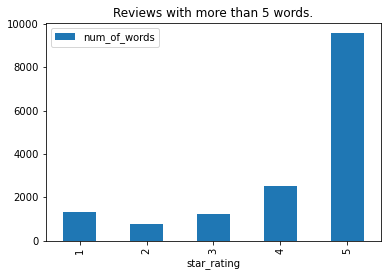

In [30]:
grouped_review_df.plot.bar(y='num_of_words', title='Reviews with more than 5 words.')

In [ ]:
ten_words_df = reviews_df[reviews_df['num_of_words'] <= 10]
ten_words_df.info()

In [ ]:
large_words_df = reviews_df[reviews_df['num_of_words'] >= 2000]
large_words_df.info()

In [ ]:
y=reviews_df['star_rating']
x=reviews_df['num_of_words']


In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x,y)

Test area below

In [ ]:
print(count_words("This is not such a long sentence ya ?"))

In [ ]:
print(reviews_df.iloc[19912])
print(reviews_df.loc[19912, 'review_body'])

In [ ]:
## testing re functionality 
words = re.findall(['], "This isn't a crazy 22 test string . What exactly is it?")
print(words)
print(len(words))

In [ ]:
ques="?"
excla="!"
test_str = "Wow! that! is totally awesome!! No?"
print(test_str.count("?"))
print(test_str.count("!"))

In [ ]:
test_a = "This is a small review. Yes ^$ or no? I don't really know. Amazon !!"
#print(remove_special_chars(test_a))
print(mt_five_word_reviews_df.iloc[100]['review_body'])
print(remove_special_chars(mt_five_word_reviews_df.iloc[100]['review_body']))

In [ ]:
list_words = []
print(mt_five_word_reviews_df.iloc[10777]['review_body'])
list_words = remove_special_chars(mt_five_word_reviews_df.iloc[10777]['review_body'])
#list_words = mt_five_word_reviews_df.iloc[10777]['review_body']
print("\n\n")
#list_words = list_words.replace("<br />"," ")
#print(list_words)

print(get_uniq_words(list_words))